# Linear Regression From Scratch

Implemented Linear Regression using gradient descent from scratch and tested on a dataset of hours studied vs student scores.

dataset obtained from: https://www.kaggle.com/datasets/himanshunakrani/student-study-hours

## What is Linear Regression?

Linear Regression is a type of supervised ML algorithm that models the relationship between the independent variables and the dependent variable by mapping data points to a linear function. 

This model essentially predicts y = b_1 * x + b_0

Where:
- ( b_1 ) is the slope (weight)
- ( b_0 ) is the intercept (bias)

We minimize the **Mean Squared Error (MSE)** between predicted and actual values using **gradient descent** (instead of using the normal Equation).

# Imports

### Libraries

In [9]:
import sys
import os

import tools.preprocessing
sys.path.append(os.path.abspath(".."))

import importlib
import tools.functions
importlib.reload(tools.preprocessing)

<module 'tools.preprocessing' from '/home/neillucha/ml-algorithms-from-scratch/tools/preprocessing.py'>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from algorithms.linear_regression import LinearRegression 
from tools.preprocessing import standardize

### Dataset

In [11]:
df = pd.read_csv('../data/score_updated.csv')
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Preprocessing

In [12]:
scores = np.array(df.Scores)
normalized_hours = standardize(np.array(df.Hours))

# Creating and Training the Linear Regressor

In [13]:
regressor = LinearRegression()
regressor.train(x = normalized_hours, y = scores, learning_rate=0.1, epochs=100, track_loss=1)

Epoch 1, 	 Loss: 2268.2211425652904
Epoch 2, 	 Loss: 1455.8160071404093
Epoch 3, 	 Loss: 935.8767204684855
Epoch 4, 	 Loss: 603.1155769984541
Epoch 5, 	 Loss: 390.14844517763396
Epoch 6, 	 Loss: 253.84948081230928
Epoch 7, 	 Loss: 166.61814361850136
Epoch 8, 	 Loss: 110.79008781446426
Epoch 9, 	 Loss: 75.0601320998805
Epoch 10, 	 Loss: 52.19296044254687
Epoch 11, 	 Loss: 37.5579705818534
Epoch 12, 	 Loss: 28.191577071009544
Epoch 13, 	 Loss: 22.19708522406951
Epoch 14, 	 Loss: 18.36061044202787
Epoch 15, 	 Loss: 15.905266581521216
Epoch 16, 	 Loss: 14.33384651079698
Epoch 17, 	 Loss: 13.32813766553346
Epoch 18, 	 Loss: 12.684484004564794
Epoch 19, 	 Loss: 12.27254566154486
Epoch 20, 	 Loss: 12.0089051220121
Epoch 21, 	 Loss: 11.840175176711137
Epoch 22, 	 Loss: 11.73218801171852
Epoch 23, 	 Loss: 11.663076226123247
Epoch 24, 	 Loss: 11.61884468334227
Epoch 25, 	 Loss: 11.590536495962445
Epoch 26, 	 Loss: 11.572419256039355
Epoch 27, 	 Loss: 11.560824222488577
Epoch 28, 	 Loss: 11.55340

(np.float64(54.0208333223291), np.float64(24.65387437223107))

# Results

### Visualization of Best-Fit Line

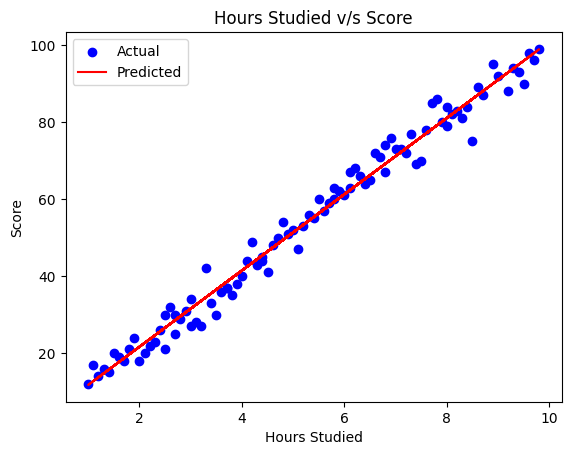

In [14]:
plt.scatter(df.Hours, df.Scores, color = 'blue', label = 'Actual')
plt.plot(df.Hours, regressor.predict(normalized_hours), color = 'red', label='Predicted')
plt.legend()
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.title('Hours Studied v/s Score')
plt.show()

### Visualizing the decrease in Loss over Epochs

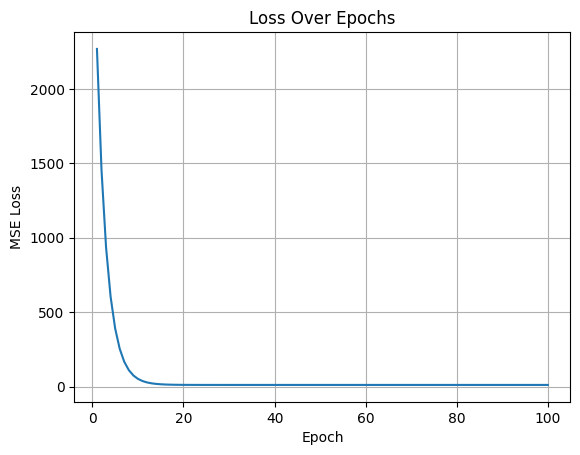

In [15]:
losses = list(regressor.loss_history.values())
plt.plot(range(1, len(losses)+1), losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss Over Epochs")
plt.grid()
plt.show()

### Final Parameters

In [16]:
print(f'Intercept: {regressor.b0:0.4f}')
print(f'Slope: {regressor.b1:0.4f}')

Intercept: 54.0208
Slope: 24.6539
